In [164]:

### 2023 not on API yet

from __future__ import print_function
import os
import time
import cfbd
import pandas as pd 

from cfbd.rest import ApiException
from pprint import pprint
from tqdm import tqdm

from dotenv import load_dotenv

load_dotenv()
pass



### Watch Sentdex GZip compression distance video for more explanation

-basically, compress two text blurbs with gzip  
-add those compressions together  
-in theory, if they are similar, then the ncd function below will show a small distance  
-then use k nearest neighbors regressor to classify  


In [165]:

## just copy/pasted from web
def clean_download():
    
    return

sp = pd.read_csv('data/SP+_2023_preseason.csv')
sp['TEAM'] = sp['TEAM'].apply(lambda x: x[x.find('.')+1:].strip())
sp['team_match'] = sp['TEAM'].copy().str.replace(' ','_').str.lower()

sp



,TEAM,SP+,OFF. SP+,DEF. SP+,team_match
0,Georgia,29.9,41.9 (9),11.9 (3),georgia
1,Ohio St.,29.6,46.4 (2),16.7 (13),ohio_st.
2,Michigan,29.2,42.0 (7),12.9 (4),michigan
3,Alabama,27.9,44.2 (5),16.3 (10),alabama
4,LSU,25.2,41.6 (10),16.4 (12),lsu
...,...,...,...,...,...
128,UL-Monroe,-19.6,18.6 (106),38.1 (126),ul-monroe
129,Akron,-19.6,18.1 (109),37.7 (124),akron
130,UMass,-21.7,11.0 (130),32.7 (101),umass
131,New Mexico,-21.7,12.2 (129),33.9 (107),new_mexico


In [166]:



matches = [file.replace('.txt','') for file in os.listdir('data/Bill_C')]

sp['team_match'] = sp['team_match'].copy().str.replace('st.','state', regex=False)

translate_map = {
    'miss._state':'mississippi_st',
    'n._carolina':'north_carolina',
    's._carolina':'south_carolina',
    'california':'cal',
    'w._virginia':'west_virginia',
    'wash._state':'washington_state',
    'va._tech':'virginia_tech',
    'ga._tech':'georgia_tech',
    's._alabama':'south_alabama',
    'boston_coll.':'boston_college',
    'coastal_caro.':'coastal_carolina',
    'app._state':'app_state',
    'jmu':'james_madison',
    'wku':'western_kentucky',
    'n._texas':'north_texas',
    'so._miss':'southern_miss',
    'ga._southern':'georgia_southern',
    'miami-oh':'miami_oh',
    'mtsu':'middle_tennessee',
    'emu':'eastern_michigan',
    'usf':'south_florida',
    'la._tech':'la_tech',
    'cmu':'central_michigan',
    'niu':'northern_illinois',
    'odu':'old_dominion',
    'wmu':'western_michigan',
    'sam_houston':'sam_houston_st',
    'nmsu':'new_mexico_st',
    "j'ville_state":'jacksonville_st',
    'bgsu':'bowling_green',
    'ul-monroe':'louisiana_monroe'
}




In [167]:

sp['team_match'] = sp['team_match'].apply(lambda x: translate_map.get(x) if x in translate_map else x)
sp['have_match'] = sp['team_match'].copy().isin(matches)
# sp.loc[sp['have_match']==False]


In [168]:
sp['file_path'] = sp['team_match'].copy().apply(lambda x: f"data/Bill_C/{x}.txt")
sp

,TEAM,SP+,OFF. SP+,DEF. SP+,team_match,have_match,file_path
0,Georgia,29.9,41.9 (9),11.9 (3),georgia,True,data/Bill_C/georgia.txt
1,Ohio St.,29.6,46.4 (2),16.7 (13),ohio_state,True,data/Bill_C/ohio_state.txt
2,Michigan,29.2,42.0 (7),12.9 (4),michigan,True,data/Bill_C/michigan.txt
3,Alabama,27.9,44.2 (5),16.3 (10),alabama,True,data/Bill_C/alabama.txt
4,LSU,25.2,41.6 (10),16.4 (12),lsu,True,data/Bill_C/lsu.txt
...,...,...,...,...,...,...,...
128,UL-Monroe,-19.6,18.6 (106),38.1 (126),louisiana_monroe,True,data/Bill_C/louisiana_monroe.txt
129,Akron,-19.6,18.1 (109),37.7 (124),akron,True,data/Bill_C/akron.txt
130,UMass,-21.7,11.0 (130),32.7 (101),umass,True,data/Bill_C/umass.txt
131,New Mexico,-21.7,12.2 (129),33.9 (107),new_mexico,True,data/Bill_C/new_mexico.txt


In [169]:

import gzip
from sklearn.neighbors import KNeighborsRegressor

with open('data/Bill_C/michigan.txt','rb') as f:
    test = f.read()
    


In [170]:
test

b"\xef\xbb\xbfWho ends up on top this time in college football's most important current rivalry? It's incredible how rivalries magnify everything good and bad. The better both teams are, the higher the stakes and the bigger the disappointment (and occasional irrationality) for whoever loses.\r\nJim Harbaugh's first five seasons as Michigan's head coach were an undeniable success. The Wolverines had finished in the AP top 20 once in six years before his arrival, and he pulled it off four times. In 2016, just two years after going 5-7 under Brady Hoke, Harbaugh's team came within millimeters of beating Ohio State and likely going to the CFP. But in those five years, the Wolverines went 0-5 against the Buckeyes, and Harbaugh was therefore labeled by many as a relative failure.\r\nOne of these two teams will again be very good and the other will end the year very unhappy.\r\nIn terms of known quantities, Michigan starts out with the edge. The Wolverines bring back their starting quarterbac

In [171]:
test_compressed = gzip.compress(test)
test_compressed

b'\x1f\x8b\x08\x00n\xe3\xd8d\x02\xffmW\xcbn\xdd6\x10\xdd\x17\xe8?\xcc&\x88\r\\\x1b\xf6M\x9c\xa2\xed\xa2\x88\x9d4\xa9\xd14E_YS\xe2\\\x89\xb9\x12\xa9\xf2aE\xdf\xd6E?\xa9\xbf\xd03C\xc9q\x9a\x02AbS\xe4p\xe6\xcc9g\x98\x7f\xfe\xfa\xfb]\x1f\x88\xbdMT&\n\x9er\x98(\xf7.Qv#\x93\xf3\xd4\x86a\xe0\x8e\xe9\x10Bn\xcc0<N4\x86\x94\xc9\x8dS\x88\xd9\xf8Lm\x89\x91\xf1otwf\x88\xcbw\xf4C\xc6&\xe7\xdb\xc8\xd65\x03S\x1f\xe6\xf5\xa3c\x9c6\x9dw\x87\x85\xf8\x8e\xe3\x82\xab|G]\x08\x96\x8c\xb7\xd4\x18{N\xbf\xf5L\r\xe7\xcc\x91\x9a\x90{\xcal\xc6D&\xf2\x0e\x99!\x9a\xebz|\x92\x1fS6GD\x94\x93\xf2k\xe3\xban\xfdb]2\xd3\x14\x9c\xcf\xa3\xa4v"[B\xdb\x9a\xe4\x827\x03\xb9\x18M\xd6\x1f]^NQ[\xa4\xb9\x0f\x92\x11\r!q:\xff\xf2\x8b[7\xd2k\x13\x1bS\xba\x1e\xe5\x1c\\D\xd1\x07w\x87[\xd9\xa4\xe0qm\xa27\xaeE:\xc6cC\xcf\xc6\x02,\xd3\xf64sd$E\xc5[\xf6\xce\x08\x04\xa9\xb4-\xa7T\x8b{\x17\x06\xdc\xe4<R\xefq\xe8\xe0\xbcK=[A[r\x7f\xfe\xb3va\x7f\x81~\xb4\xda\x83\xe4>\xd0\xc2&&\xe0\x82\\\x05\x03\x01D1\xddi\xf986\x154\nA2\x85\xc3\x01%\x95\xa8=\xc

In [172]:

teams = set(sp['TEAM'].unique())
team_blurbs = {
    
}

for index,row in tqdm(sp.iterrows(),total=len(sp)):
    with open(row['file_path'],'r') as f:
        blurb = f.read()
        
    ## actually need the original blurb
#     blurb_compress = gzip.compress(blurb)
    team_blurbs[row['TEAM']] = {}
    team_blurbs[row['TEAM']]['blurb'] = blurb
    team_blurbs[row['TEAM']]['target'] = row['SP+']
    
    


100%|█████████████████████████████████████████████████████████████████████████████| 133/133 [00:00<00:00, 13298.74it/s]


In [173]:

def ncd(x1_blurb, x2_blurb):
    x1_comp = gzip.compress(x1_blurb.encode())
    x2_comp = gzip.compress(x2_blurb.encode())
    x1_comp_len = len(x1_comp)
    x2_comp_len = len(x2_comp)
    joined_len = len(gzip.compress(" ".join([x1_blurb, x2_blurb]).encode()))
    return (joined_len - min(x1_comp_len,x2_comp_len))/max(x1_comp_len,x2_comp_len)

## should be very close
print(ncd(team_blurbs['S. Alabama']['blurb'], team_blurbs['Troy']['blurb']))

## should be very far
print(ncd(team_blurbs['Alabama']['blurb'], team_blurbs['UMass']['blurb']))



0.35709436524100474
0.8929395477618828


In [174]:
## c
train_X = []
opp_blurbs = team_blurbs.copy()
team_order = []
targets = []
for k,v in team_blurbs.items():
    team_row=[]
    team_order.append(k)
    targets.append(v['target'])
    for k2, v2 in opp_blurbs.items():
        team_row.append(ncd(v['blurb'], v2['blurb']))
        
    train_X.append(team_row)


In [175]:

from sklearn.model_selection import cross_val_predict, cross_val_score, KFold



In [176]:

## 10 diff data splits
pred_df = pd.DataFrame({
    'team':team_order,
    'ratings':targets
})
scores = []
for i in tqdm(range(10)):
    cv = KFold(random_state=17+i, shuffle=True, n_splits=10)
    reg = KNeighborsRegressor(n_neighbors=7)
    y_pred = cross_val_predict(reg, train_X, targets, cv=cv)
    reg = KNeighborsRegressor(n_neighbors=7)
    score = cross_val_score(reg, train_X, targets, cv=cv, scoring='neg_mean_squared_error')
    pred_df[f'pred_{i+1}'] = y_pred
    scores.append(score)
    
    


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.28it/s]


In [177]:

import numpy as np
baseline_mse = np.mean(pred_df['ratings'].copy()**2)
print(baseline_mse)


189.173007518797


In [178]:
# 6: -95.21
# 7: -93.78
# 8: -95.12
print(np.mean(scores))


-93.77869467369365


In [179]:

pred_df['final_prediction'] = pred_df[[f'pred_{i}' for i in range(1,11)]].mean(axis=1)



In [180]:

configuration = cfbd.Configuration()
configuration.api_key['Authorization'] = os.getenv('CFBD_API')
configuration.api_key_prefix['Authorization'] = 'Bearer'

api_config = cfbd.ApiClient(configuration)


In [181]:

teams_api = cfbd.TeamsApi(api_config)
team_info = teams_api.get_fbs_teams()


In [182]:

team_logo_dict = {}
team_color_dict = {}
for v in team_info:
    team_logo_dict[v.school] = v.logos[0]
    team_color_dict[v.school] = v.color

In [183]:

cfbd_translate = {
    'Miss. State':'Mississippi State',
    'N. Carolina':'North Carolina',
    'S. Carolina':'South Carolina',
    'W. Virginia':'West Virginia',
    'UTSA':'UT San Antonio',
    'Va. Tech':'Virginia Tech',
    'Ga. Tech':'Georgia Tech',
    'S. Alabama':'South Alabama',
    'Boston Coll.':'Boston College',
    'Coastal Caro.':'Coastal Carolina',
    'App. State':'Appalachian State',
    'JMU':"James Madison",
    'FAU':'Florida Atlantic',
    'WKU':"Western Kentucky",
    'SDSU':"San Diego State",
    'N. Texas':'North Texas',
    'Ga. Southern':'Georgia Southern',
    'ECU':"East Carolina",
    'So. Miss':'Southern Mississippi',
    'SJSU':'San José State',
    'Wash. State':'Washington State',
    'Miami-OH': 'Miami (OH)',
    'MTSU':'Middle Tennessee',
    'EMU':"Eastern Michigan",
    'USF':'South Florida',
    'La. Tech':'Louisiana Tech',
    'CMU':"Central Michigan",
    'NIU':"Northern Illinois",
    'UConn':'Connecticut',
    'ODU':"Old Dominion",
    'WMU':'Western Michigan',
    'Sam Houston':'Sam Houston State',
    'NMSU':'New Mexico State',
    "J'ville State":'Jacksonville State',
    'Hawaii':"Hawai'i",
    'BGSU':'Bowling Green',
    'FIU':"Florida International",
    'UL-Monroe':'Louisiana Monroe'
    
}


In [184]:
pred_df['cfbd_team'] = pred_df['team'].copy().str.strip()
pred_df['cfbd_team'] = pred_df['cfbd_team'].str.replace('St.','State',regex=False)
pred_df['cfbd_team'] = pred_df['cfbd_team'].apply(lambda x: cfbd_translate[x] if x in cfbd_translate else x)
pred_df['logo'] = pred_df['cfbd_team'].apply(lambda x: team_logo_dict.get(x))

In [185]:
import urllib
import PIL
import os

In [186]:
import time
import requests 

## downloading logos, only have to do once

# for index, row in pred_df.iterrows():
#     team = row['cfbd_team']
#     logo_path = row['logo']
#     local_path = os.path.join('data/logos',f'{team}.png')
#     with open(local_path, 'wb') as f:
#         f.write(requests.get(logo_path).content)
#     time.sleep(0.25)
    

In [187]:

import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def getImage(path, zoom=0.15):
    return OffsetImage(plt.imread(path), zoom=zoom)

getImage('data/logos/Georgia.png')


In [188]:

pred_df['local_path'] = pred_df['cfbd_team'].copy().apply(lambda x: os.path.join('data/logos',f'{x}.png'))


In [189]:

from sklearn.linear_model import LinearRegression 
model = LinearRegression()
x = pred_df['final_prediction'].copy().values.reshape(-1,1)
y = pred_df['ratings'].copy().values.reshape(-1,1)
model.fit(x, y)


LinearRegression()

In [190]:
xrange = np.linspace(-17.5, 25).reshape(-1,1)
model_pred = model.predict(xrange)

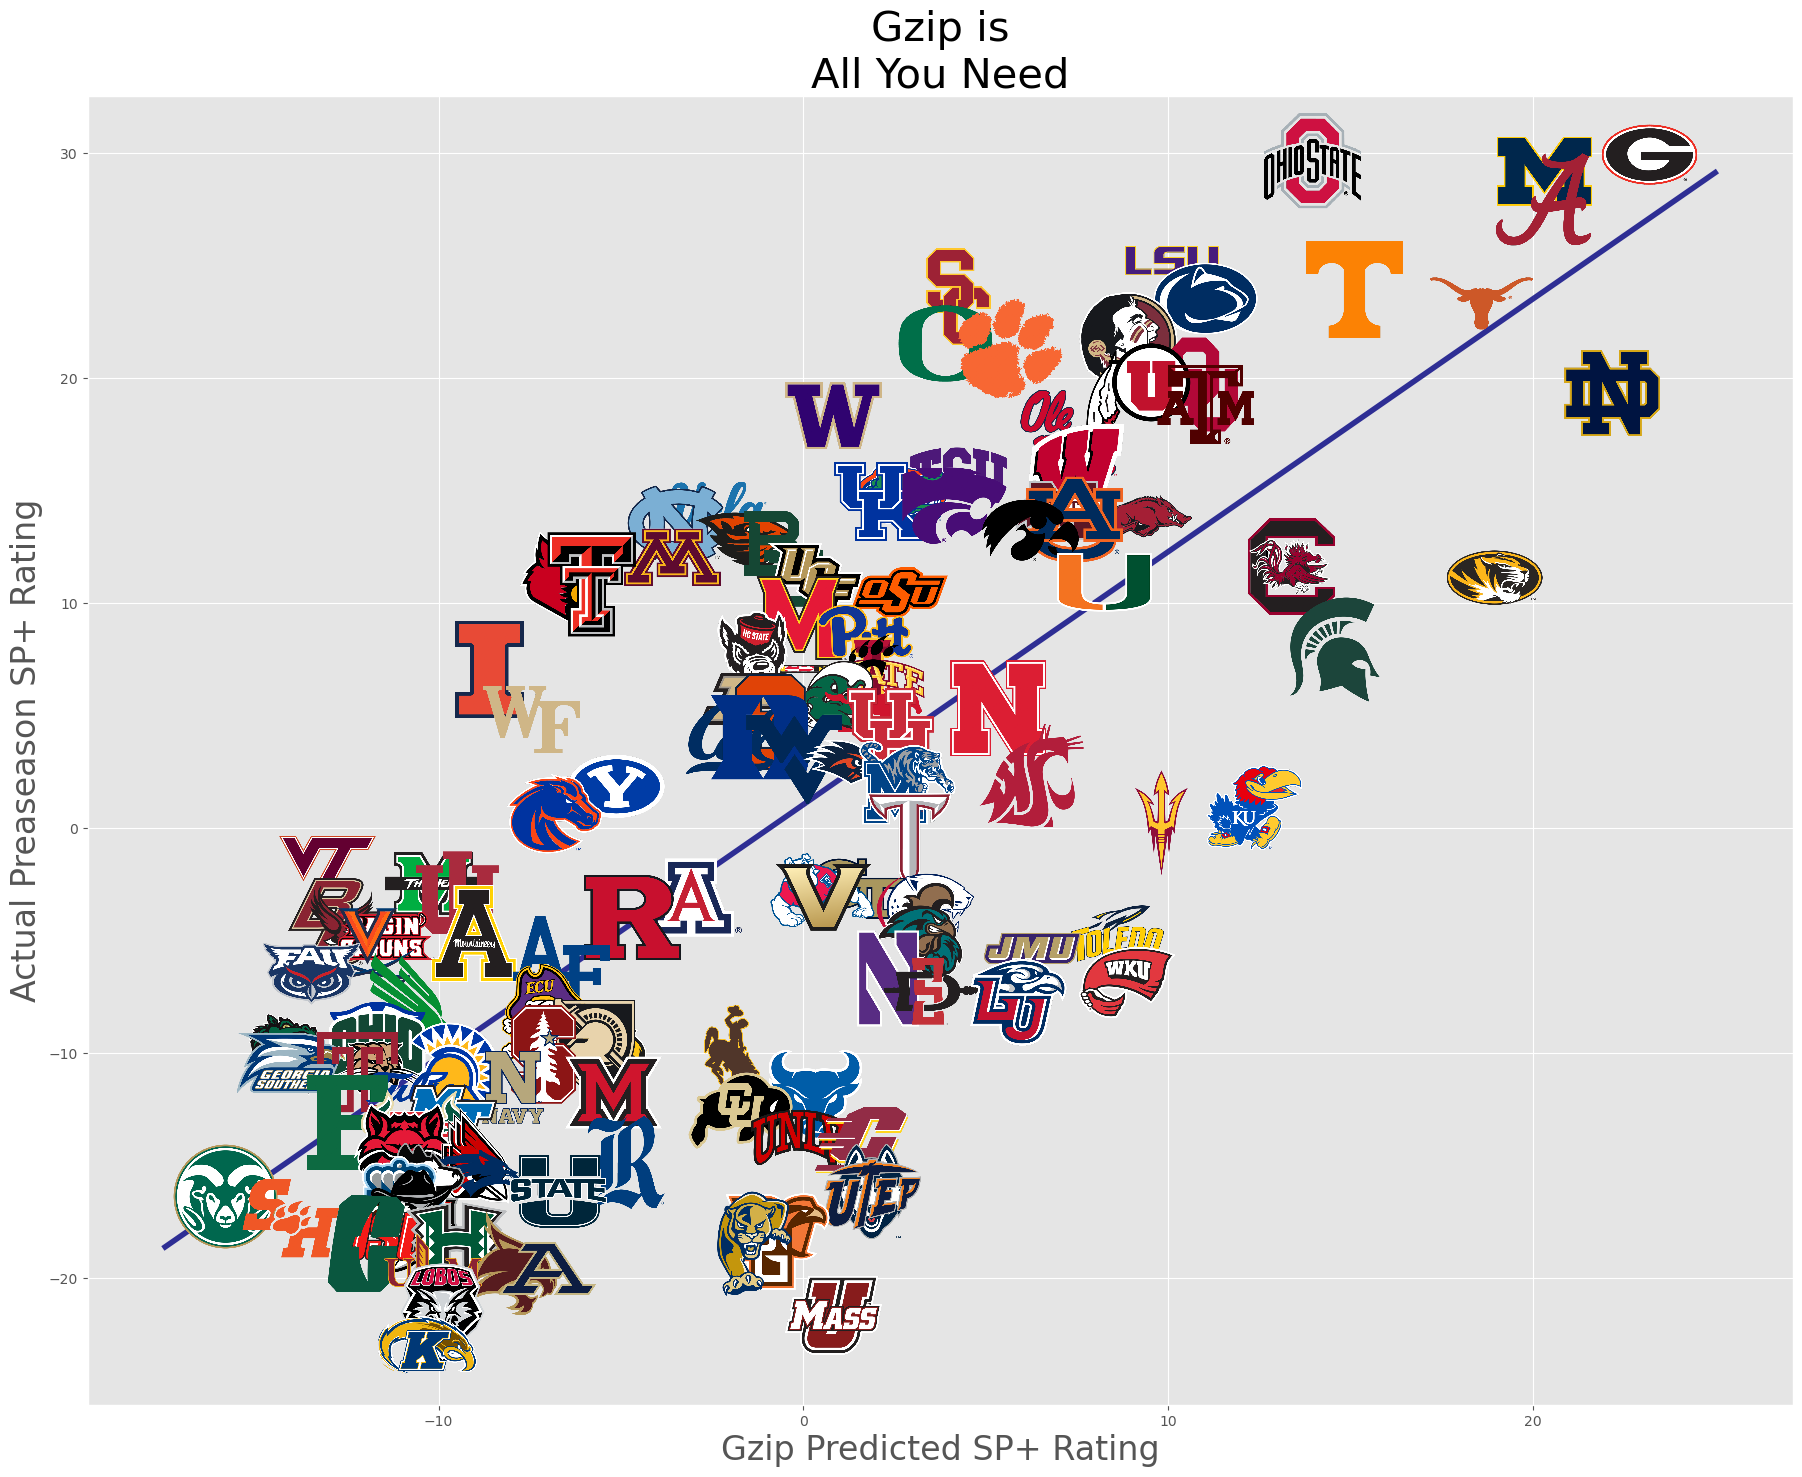

In [191]:
plt.style.use('ggplot')

paths = pred_df['local_path'].copy()
fig, ax = plt.subplots(figsize=(22,17))
x = pred_df['final_prediction'].copy()
y = pred_df['ratings'].copy()
ax.plot(xrange, model_pred, color='navy', alpha=0.8, linewidth=4)
ax.scatter(x, y, alpha=0)
ax.set_xlabel("Gzip Predicted SP+ Rating", fontsize=24)
ax.set_ylabel("Actual Preaseason SP+ Rating", fontsize=24)
ax.set_title("Gzip is\nAll You Need", fontsize=30)
for x0, y0, path in zip(x, y,paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)

plt.savefig('data/output/gzip_ayn.png')
    

In [192]:

pred_df['GZIP_rel'] = pred_df['final_prediction'].copy()-pred_df['ratings'].copy()






In [193]:
pred_df['color'] = pred_df['cfbd_team'].map(team_color_dict)
pred_df

,team,ratings,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10,final_prediction,cfbd_team,logo,local_path,GZIP_rel,color
0,Georgia,29.9,24.414286,22.500000,24.414286,22.442857,20.742857,24.414286,24.414286,20.514286,23.314286,24.785714,23.195714,Georgia,http://a.espncdn.com/i/teamlogos/ncaa/500/61.png,data/logos\Georgia.png,-6.704286,#CC0000
1,Ohio St.,29.6,11.114286,12.985714,11.114286,15.457143,16.157143,17.257143,13.900000,16.157143,12.985714,12.414286,13.954286,Ohio State,http://a.espncdn.com/i/teamlogos/ncaa/500/194.png,data/logos\Ohio State.png,-15.645714,#DE3121
2,Michigan,29.2,19.614286,20.914286,20.914286,19.614286,20.985714,20.914286,20.914286,20.914286,19.614286,18.800000,20.320000,Michigan,http://a.espncdn.com/i/teamlogos/ncaa/500/130.png,data/logos\Michigan.png,-8.880000,#00274c
3,Alabama,27.9,22.085714,19.214286,22.085714,22.085714,22.085714,19.214286,18.842857,22.085714,16.871429,18.342857,20.291429,Alabama,http://a.espncdn.com/i/teamlogos/ncaa/500/333.png,data/logos\Alabama.png,-7.608571,#690014
4,LSU,25.2,11.657143,10.214286,10.214286,11.657143,11.657143,8.428571,11.657143,11.657143,6.771429,7.457143,10.137143,LSU,http://a.espncdn.com/i/teamlogos/ncaa/500/99.png,data/logos\LSU.png,-15.062857,#fdd023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,UL-Monroe,-19.6,-10.114286,-10.114286,-10.114286,-9.471429,-9.471429,-10.114286,-11.200000,-9.585714,-11.185714,-10.114286,-10.148571,Louisiana Monroe,http://a.espncdn.com/i/teamlogos/ncaa/500/2433...,data/logos\Louisiana Monroe.png,9.451429,#231F20
129,Akron,-19.6,-7.114286,-7.114286,-6.428571,-7.114286,-7.114286,-7.700000,-7.114286,-7.114286,-7.114286,-6.328571,-7.025714,Akron,http://a.espncdn.com/i/teamlogos/ncaa/500/2006...,data/logos\Akron.png,12.574286,#00285e
130,UMass,-21.7,2.557143,-1.228571,1.442857,1.442857,-2.057143,1.442857,1.442857,2.371429,1.442857,-0.700000,0.815714,UMass,http://a.espncdn.com/i/teamlogos/ncaa/500/113.png,data/logos\UMass.png,22.515714,#880007
131,New Mexico,-21.7,-9.400000,-9.400000,-10.642857,-10.342857,-9.414286,-11.157143,-10.242857,-9.400000,-8.871429,-10.242857,-9.911429,New Mexico,http://a.espncdn.com/i/teamlogos/ncaa/500/167.png,data/logos\New Mexico.png,11.788571,#000000


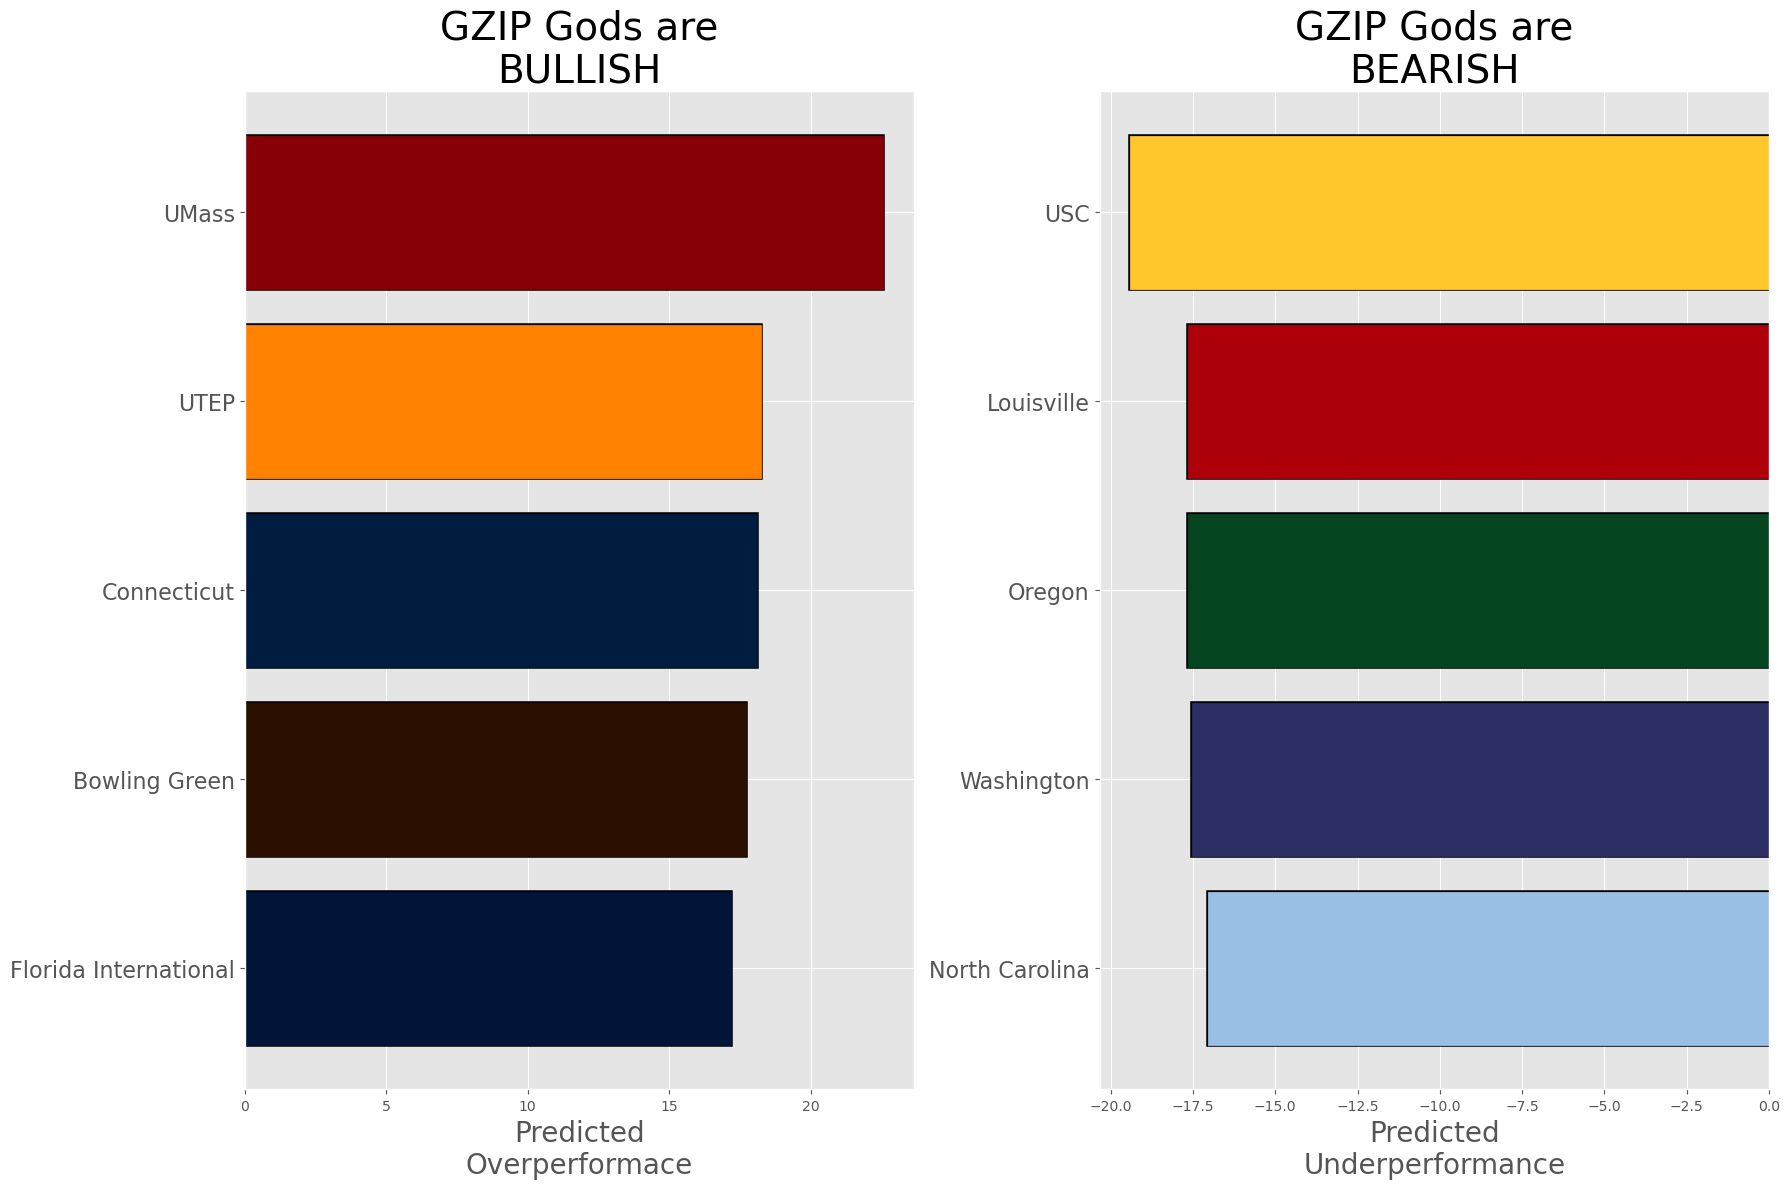

In [194]:
import random

fig, axes = plt.subplots(1, 2, figsize=(18, 12))
ax1 = axes[0]
ax2 = axes[1]
y_pos = np.ones(5)*5-range(5)
bulls = pred_df.sort_values(by='GZIP_rel',ascending=False).head()
ax1.set_yticks(y_pos, labels=bulls.cfbd_team, fontsize=16)
bears = pred_df.sort_values(by='GZIP_rel').head()
ax1.barh(y_pos, bulls.GZIP_rel, align='center',edgecolor='k',linewidth=4)
bull_bars = ax1.barh(y_pos, bulls.GZIP_rel, align='center',edgecolor='k',linewidth=2)
ax1.set_xlabel("Predicted\nOverperformace",fontsize=20)
for i in range(5):
    bull_bars[i].set_color(bulls.iloc[i]['color'])
ax1.set_title("GZIP Gods are\nBULLISH",fontsize=28)
ax2.set_yticks(y_pos, labels=bears.cfbd_team, fontsize=16)
ax2.barh(y_pos, bears.GZIP_rel, align='center',edgecolor='k',linewidth=4)
bear_bars = ax2.barh(y_pos, bears.GZIP_rel, align='center',edgecolor='k',linewidth=2)
ax2.set_xlabel("Predicted\nUnderperformance",fontsize=20)
ax2.set_title("GZIP Gods are\nBEARISH",fontsize=28)
for i in range(5):
    bear_bars[i].set_color(bears.iloc[i]['color'])
fig.tight_layout()
plt.savefig('data/output/gzip_bull_bear.png')
plt.show()



### Going to try on game play by plays lol
- borrowed some code from https://blog.collegefootballdata.com/opponent-adjusted-stats-ridge-regression/
- gzip wasn't great so ended up using "bag of words"


In [195]:

## downloading some data from the great cfbd api
def get_schedule(year, save=True):
    
    api_instance = cfbd.GamesApi(cfbd.ApiClient(configuration))
    api_response = api_instance.get_calendar(year)
    dfCal = pd.DataFrame().from_records([g.to_dict()for g in api_response])
    games = []
    for i, row in tqdm(dfCal.iterrows(),total=len(dfCal)):
        api_response = api_instance.get_games(year, week=row['week'], season_type=row['season_type'])
        wk_gms = pd.DataFrame().from_records([g.to_dict()for g in api_response])
        games.append(wk_gms)
        
    games = pd.concat(games, axis=0).reset_index(drop=True)
    if save:
        path=f'C://Users/Blake/Code/Sports/NCAA_football/data/games/{year}.csv'
        games.to_csv(path, index=False)
    
    return games

def load_schedule(year):
    path=f'C://Users/Blake/Code/Sports/NCAA_football/data/games/{year}.csv'
    return pd.read_csv(path)

# schedule = get_schedule(2021)
# schedule = get_schedule(2022)
train_games = load_schedule(2021)
test_games = load_schedule(2022)
train_games.head()


,id,season,week,season_type,start_date,start_time_tbd,completed,neutral_site,conference_game,attendance,...,away_conference,away_division,away_points,away_line_scores,away_post_win_prob,away_pregame_elo,away_postgame_elo,excitement_index,highlights,notes
0,401282714,2021,1,regular,2021-08-28T17:20:00.000Z,False,True,False,True,41064.0,...,Big Ten,fbs,22,"[0, 9, 7, 6]",0.594339,1503.0,1484.0,5.485981,NaN,NaN
1,401286187,2021,1,regular,2021-08-28T18:00:00.000Z,False,True,False,False,26043.0,...,FBS Independents,fbs,0,"[0, 0, 0, 0]",0.001032,1223.0,1122.0,1.535556,NaN,NaN
2,401329133,2021,1,regular,2021-08-28T19:00:00.000Z,False,True,True,True,NaN,...,SIAC,ii,20,"[6, 7, 0, 7]",NaN,NaN,NaN,NaN,NaN,NaN
3,401309833,2021,1,regular,2021-08-28T19:30:00.000Z,False,True,False,False,32982.0,...,Mountain West,fbs,10,"[3, 0, 7, 0]",0.001076,1466.0,1378.0,1.391185,NaN,NaN
4,401328337,2021,1,regular,2021-08-28T22:00:00.000Z,False,True,False,False,NaN,...,OVC,fcs,21,"[0, 7, 7, 7]",NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
os.listdir('C://Users/Blake/Code/Sports/NCAA_football/data/')
# os.remove('C://Users/Blake/Code/Sports/NCAA_football/data/game_stats')

['box_scores', 'games', 'pbp']

In [197]:

# box = pd.DataFrame().from_records([g.to_dict()for g in api_response])
# api_response

In [198]:

lvl_1_stats = ['school','conference','home_away','points']
lvl_2_stats = ['rushingTDs','puntReturnYards','puntReturnTDs','puntReturns','passingTDs','kickReturnYards','kickReturnTDs','kickReturns',
               'kickingPoints','interceptionYards','interceptionTDs','passesIntercepted','fumblesRecovered','totalFumbles','tacklesForLoss','defensiveTDs','tackles','sacks',
               'qbHurries','passesDeflected','possessionTime','interceptions','fumblesLost','turnovers','totalPenaltiesYards',
              'yardsPerRushAttempt','rushingAttempts','rushingYards','yardsPerPass','completionAttempts',
               'netPassingYards','totalYards','fourthDownEff','thirdDownEff','firstDowns']



In [199]:
import gc
gc.collect()

30488


### But first, a numerical model baseline


In [200]:

def parse_game_response(game):

    game_id = game.to_dict()['id']
    team_1_row = [game_id]
    team_2_row = [game_id]
    team_1_dict = game.to_dict()['teams'][0]
    team_2_dict = game.to_dict()['teams'][1]
    team_1_row.extend([team_1_dict[stat] for stat in lvl_1_stats])
    team_2_row.extend([team_2_dict[stat] for stat in lvl_1_stats])
    
    t1_stat_dict = {s['category']:s['stat'] for s in team_1_dict['stats']}
    t2_stat_dict = {s['category']:s['stat'] for s in team_2_dict['stats']}
    missing = [k for k in t1_stat_dict.keys() if k not in lvl_2_stats]
    if len(missing)>0:
        print("Uh oh, missing this stat: ", missing)
    for l2_stat in lvl_2_stats:
        team_1_row.append(t1_stat_dict.get(l2_stat))
    for l2_stat in lvl_2_stats:
        team_2_row.append(t2_stat_dict.get(l2_stat))
    
    return team_1_row, team_2_row

def get_boxscores(year, save=True):
    
    api_instance = cfbd.GamesApi(cfbd.ApiClient(configuration))
    api_response = api_instance.get_calendar(year)
    dfCal = pd.DataFrame().from_records([g.to_dict()for g in api_response])
    
    boxes = []
    for index, row in tqdm(dfCal.iterrows(), total=len(dfCal)):
        season, week = row['season'], row['week']
        api_response =  api_instance.get_team_game_stats(year=season, week=week, season_type=row['season_type'])
        for game in api_response:
            t1_row, t2_row = parse_game_response(game)
            boxes.append(t1_row)
            boxes.append(t2_row)
            
    boxes = pd.DataFrame(boxes, columns=['game_id']+lvl_1_stats+lvl_2_stats)
    if save:
        boxes.to_csv(f'C://Users/Blake/Code/Sports/NCAA_football/data/box_scores/{season}.csv',index=False)
            
    return boxes

# train_boxes = get_boxscores(2021)
# test_boxes = get_boxscores(2022)

def load_boxscores(season):
    return pd.read_csv(f'C://Users/Blake/Code/Sports/NCAA_football/data/box_scores/{season}.csv')

train_boxes = load_boxscores(2021)
test_boxes = load_boxscores(2022)
train_boxes.head()


,game_id,school,conference,home_away,points,rushingTDs,puntReturnYards,puntReturnTDs,puntReturns,passingTDs,...,yardsPerRushAttempt,rushingAttempts,rushingYards,yardsPerPass,completionAttempts,netPassingYards,totalYards,fourthDownEff,thirdDownEff,firstDowns
0,401282614,Florida State,ACC,home,38,3,NaN,NaN,NaN,2.0,...,5.5,48,264,6.8,14-26,178,442,1-2,7-16,19
1,401282614,Notre Dame,FBS Independents,away,41,1,4.0,0.0,1.0,4.0,...,1.9,35,65,10.5,26-35,366,431,1-2,6-17,17
2,401281946,Clemson,ACC,home,3,0,NaN,NaN,NaN,0.0,...,0.1,23,2,4.8,19-37,178,180,0-1,5-16,14
3,401281946,Georgia,SEC,away,10,0,13.0,0.0,2.0,0.0,...,3.9,31,121,4.5,22-30,135,256,0-0,7-15,15
4,401281945,Florida Atlantic,Conference USA,away,14,1,-1.0,0.0,1.0,1.0,...,2.5,37,92,7.9,19-33,261,353,0-2,5-12,23


In [201]:
def prep_boxes(df):
    
    df = df[['game_id','school','points','netPassingYards','rushingYards']].copy()
    df['team'] = df.groupby('game_id')['school'].transform(lambda x: x.rank(method='dense'))
    df = df.drop_duplicates(subset=['game_id','team']).reset_index(drop=True) # some duplicate rows
    df = df.pivot(index='game_id',columns=['team'], values=['school','points','netPassingYards','rushingYards']).reset_index()
    df.columns=['game_id','team','opp','team_points','opp_points','team_passing_yards','opp_passing_yards','team_rushing_yards','opp_rushing_yards']

    return df

train_df = prep_boxes(train_boxes.copy())
test_df = prep_boxes(test_boxes.copy())
train_df.head()



,game_id,team,opp,team_points,opp_points,team_passing_yards,opp_passing_yards,team_rushing_yards,opp_rushing_yards
0,401281942,Alabama,Miami,44,13,354,179,147,87
1,401281943,Arkansas,Rice,38,17,128,227,245,81
2,401281944,Akron,Auburn,10,60,191,297,-3,316
3,401281945,Florida,Florida Atlantic,35,14,153,261,400,92
4,401281946,Clemson,Georgia,3,10,178,135,2,121


In [202]:

# duplicate team/opp with opp/team and add time
opp_train = train_df.copy()
opp_train = opp_train.rename(columns={'team':'opp','opp':'team','team_passing_yards':'opp_passing_yards',
                                     'opp_passing_yards':'team_passing_yards','team_rushing_yards':'opp_rushing_yards',
                                     'opp_rushing_yards':'team_rushing_yards','team_points':'opp_points','opp_points':'team_points'})
opp_test = test_df.copy()
opp_test = opp_test.rename(columns={'team':'opp','opp':'team','team_passing_yards':'opp_passing_yards',
                                     'opp_passing_yards':'team_passing_yards','team_rushing_yards':'opp_rushing_yards',
                                     'opp_rushing_yards':'team_rushing_yards','team_points':'opp_points','opp_points':'team_points'})
train_df = pd.concat([train_df, opp_train], axis=0).reset_index(drop=True)
test_df = pd.concat([test_df, opp_test], axis=0).reset_index(drop=True)

train_games['start_date'] = pd.to_datetime(train_games['start_date'].copy())
test_games['start_date'] = pd.to_datetime(test_games['start_date'].copy())

train_games = train_games.drop_duplicates(subset=['id'])
test_games = test_games.drop_duplicates(subset=['id'])
train_games = train_games.rename(columns={'id':'game_id'})
test_games = test_games.rename(columns={'id':'game_id'})

train_df = pd.merge(train_df, train_games[['game_id','start_date']], how='left', on=['game_id'])
test_df = pd.merge(test_df, test_games[['game_id','start_date']], how='left', on=['game_id'])


In [203]:

train_df = train_df.sort_values(by='start_date').reset_index(drop=True)
test_df = test_df.sort_values(by='start_date').reset_index(drop=True)



In [204]:
train_df.head()

,game_id,team,opp,team_points,opp_points,team_passing_yards,opp_passing_yards,team_rushing_yards,opp_rushing_yards,start_date
0,401282714,Illinois,Nebraska,30,22,159,232,167,160,2021-08-28 17:20:00+00:00
1,401282714,Nebraska,Illinois,22,30,232,159,160,167,2021-08-28 17:20:00+00:00
2,401286187,Connecticut,Fresno State,0,45,72,382,35,156,2021-08-28 18:00:00+00:00
3,401286187,Fresno State,Connecticut,45,0,382,72,156,35,2021-08-28 18:00:00+00:00
4,401309833,UCLA,Hawai'i,44,10,148,243,244,26,2021-08-28 19:30:00+00:00



### Now, create bag of words data


In [205]:

rename_map = {
    '0_kickoff':'kickoff',
    '1_kickoff':'kickoff',
    '2_kickoff':'kickoff',
    '3_kickoff':'kickoff',
    '4_kickoff':'kickoff',
    '0_kickoff_return_(offense)':'kickoff',
    '1_kickoff_return_(offense)':'kickoff',
    '2_kickoff_return_(offense)':'kickoff',
    '3_kickoff_return_(offense)':'kickoff',
    '4_kickoff_return_(offense)':'kickoff',
    '1_fumble_recovery_(opponent)':'1_fumble_recovery',
    '1_fumble_recovery_(own)':'1_fumble_recovery',
    '2_fumble_recovery_(opponent)':'2_fumble_recovery',
    '2_fumble_recovery_(own)':'2_fumble_recovery',
    '3_fumble_recovery_(opponent)':'3_fumble_recovery',
    '3_fumble_recovery_(own)':'3_fumble_recovery',
    '4_fumble_recovery_(opponent)':'4_fumble_recovery',
    '4_fumble_recovery_(own)':'4_fumble_recovery',
    '1_pass_interception_return':'1_interception',
    '2_pass_interception_return':'2_interception',
    '3_pass_interception_return':'3_interception',
    '4_pass_interception_return':'4_interception',
    '0_penalty':'1_penalty',
    '0_timeout':'1_timeout'
}


def load_pbp(year):
    return pd.read_csv(f'C://Users/Blake/Code/Sports/NCAA_football/data/pbp/{year}.csv')

def create_bow(pbp):
    pbp['bow_encode'] = pbp['down'].copy().astype(str)+'_'+pbp['play_type'].copy().str.lower().str.replace(' ','_')
    pbp = pbp.copy().dropna(subset=['play_text']).reset_index(drop=True)
    
    
    ## only want things that happen often
    pbp['bow_encode'] = pbp['bow_encode'].apply(lambda x: rename_map[x] if x in rename_map else x)
    pbp = pbp.loc[~pbp['bow_encode'].str.contains('end_')].reset_index(drop=True)
    pbp = pbp.groupby(['game_id','offense','defense'])['bow_encode'].value_counts().reset_index(name='count').copy()
    valid = pbp.groupby(['bow_encode'])['count'].sum()[pbp.groupby(['bow_encode'])['count'].sum()>25]
    pbp = pbp.loc[pbp['bow_encode'].isin(valid.index)].reset_index(drop=True)
    pbp = pbp.pivot(index=['game_id','offense','defense'], columns=['bow_encode'], values=['count']).fillna(0).reset_index()
    pbp.columns=[col[0].replace('count','')+col[1] for col in list(pbp)]

    return pbp

bow_21 = create_bow(load_pbp(2021))
bow_22 = create_bow(load_pbp(2022))


In [206]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_cols = [col for col in list(bow_21) if col not in ['offense','defense','game_id']]
X_input = ss.fit_transform(bow_21[X_cols].values)



In [207]:

pca = PCA(n_components=2)
embeddings = pca.fit_transform(np.array(X_input))


In [208]:

pca.fit(np.array(X_input))
print(pca.explained_variance_ratio_)
print(pca.singular_values_)



[0.07482775 0.05424528]
[81.91613789 69.7459663 ]


In [209]:
train_df.head()

,game_id,team,opp,team_points,opp_points,team_passing_yards,opp_passing_yards,team_rushing_yards,opp_rushing_yards,start_date
0,401282714,Illinois,Nebraska,30,22,159,232,167,160,2021-08-28 17:20:00+00:00
1,401282714,Nebraska,Illinois,22,30,232,159,160,167,2021-08-28 17:20:00+00:00
2,401286187,Connecticut,Fresno State,0,45,72,382,35,156,2021-08-28 18:00:00+00:00
3,401286187,Fresno State,Connecticut,45,0,382,72,156,35,2021-08-28 18:00:00+00:00
4,401309833,UCLA,Hawai'i,44,10,148,243,244,26,2021-08-28 19:30:00+00:00


In [210]:
bow_21.head()

,game_id,offense,defense,1_field_goal_good,1_fumble_recovery,1_interception,1_interception_return_touchdown,1_kickoff_return_touchdown,1_pass_incompletion,1_pass_reception,...,4_pass_incompletion,4_pass_reception,4_passing_touchdown,4_penalty,4_punt,4_rush,4_rushing_touchdown,4_sack,4_timeout,kickoff
0,401281942,Alabama,Miami,0.0,1.0,0.0,0.0,0.0,2.0,9.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0
1,401281942,Miami,Alabama,0.0,0.0,1.0,0.0,0.0,3.0,12.0,...,0.0,1.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,3.0
2,401281943,Arkansas,Rice,0.0,0.0,1.0,0.0,0.0,2.0,7.0,...,0.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,7.0
3,401281943,Rice,Arkansas,0.0,0.0,0.0,0.0,0.0,5.0,4.0,...,0.0,1.0,0.0,1.0,6.0,1.0,0.0,0.0,1.0,4.0
4,401281944,Akron,Auburn,0.0,0.0,0.0,0.0,0.0,2.0,7.0,...,0.0,2.0,0.0,0.0,7.0,4.0,0.0,0.0,0.0,4.0


In [211]:

bow_21 = bow_21.rename(columns={'offense':'team','defense':'opp'})
bow_22 = bow_22.rename(columns={'offense':'team','defense':'opp'})
bow_21 = bow_21.merge(train_df[['game_id','team','opp','team_points']].copy(), on=['game_id','team','opp'], how='left')
bow_22 = bow_22.merge(test_df[['game_id','team','opp','team_points']].copy(), on=['game_id','team','opp'], how='left')


In [212]:
meta = bow_21.copy()[['game_id','team','opp','team_points']]
# meta['score_total'] = meta['team_score'].copy()+meta['opp_score'].copy()
# meta['score_diff'] = meta['team_score'].copy()-meta['opp_score'].copy()
meta['label'] = meta['team'].copy()+'_vs._'+meta['opp'].copy()+'\n('+meta['team_points'].copy().astype(str)+' points)'


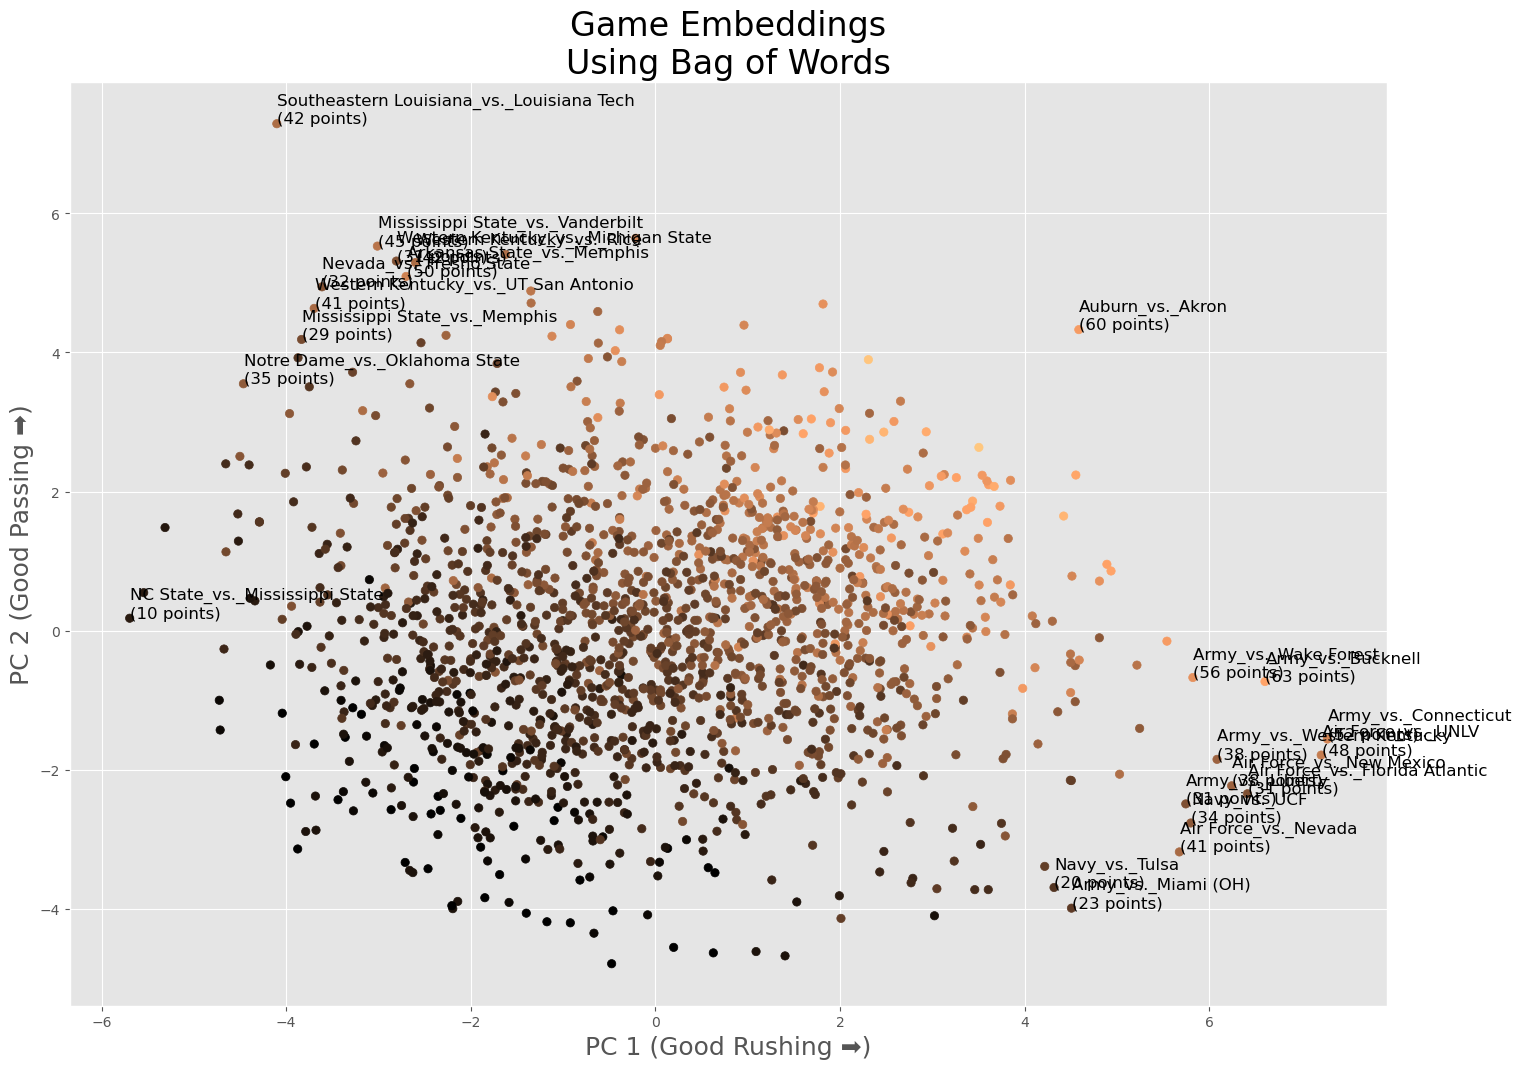

In [213]:

fig, ax=plt.subplots(figsize=(17,12))
ax.scatter(embeddings[:, 0], embeddings[:, 1], c=meta['team_points']+10, cmap='copper')
# ax.scatter(ole_miss_data[:, 0], ole_miss_data[:, 1], c='crimson', s=70,label='Ole Miss')
# ax.scatter(bc_data[:, 0], bc_data[:, 1], c='maroon', s=70,label='Boston College')
# ax.scatter(washington_data[:, 0], washington_data[:, 1], c='purple', s=70,label='Washington')
# ax.scatter(rutgers_data[:, 0], rutgers_data[:, 1], c='black', s=70,label='Rutgers')

ax.set_title("Game Embeddings\nUsing Bag of Words",fontsize=24)
for i in range(embeddings.shape[0]):
    if (embeddings[i,0]**2) + (embeddings[i,1]**2) > 32:
#         ax.scatter(embeddings[i, 0], embeddings[i, 1], c='orange', s=70,label='Tennessee')
        ax.text(x=embeddings[i,0]+0.005,y=embeddings[i,1]+0.005,s=meta.iloc[i]['label'],fontsize=12)
    if ('Georgia' in meta.iloc[i]['team']) & ('TCU' in meta.iloc[i]['opp']):
        ax.text(x=embeddings[i,0]+0.005,y=embeddings[i,1]+0.005,s=meta.iloc[i]['label'],fontsize=12)
#     if 'USC' in meta.iloc[i]['team']:
#         ax.scatter(embeddings[i, 0], embeddings[i, 1], c='red', s=100, label='Georgia')
#         ax.text(x=embeddings[i,0]+0.005,y=embeddings[i,1]+0.005,s=meta.iloc[i]['label'],fontsize=12)
#     if 'Iowa_' in meta.iloc[i]['label']:
#         ax.scatter(embeddings[i, 0], embeddings[i, 1], c='gold', s=100, label='Iowa')
#         ax.text(x=embeddings[i,0]+0.005,y=embeddings[i,1]+0.005,s=meta.iloc[i]['label'],fontsize=12)
ax.set_xlabel('PC 1 (Good Rushing ➡️)',fontsize=18)
ax.set_ylabel('PC 2 (Good Passing ➡️)',fontsize=18)
# ax.legend(fontsize=16)
plt.savefig("C://Users/Blake/Downloads/bows_example.png")
plt.show()
#     if 'Washington_' in meta.iloc[i]['label']:
#         ax.text(x=embeddings[i,0]+0.005,y=embeddings[i,1]+0.005,s=meta.iloc[i]['label'],fontsize=12)
#     if 'Boston College' in meta.iloc[i]['team']:
#         ax.text(x=embeddings[i,0]+0.005,y=embeddings[i,1]+0.005,s=meta.iloc[i]['label'],fontsize=12)
#     if embeddings[i, 1]>0.95:
#         ax.text(x=embeddings[i,0]+0.005,y=embeddings[i,1]+0.005,s=meta.iloc[i]['label'],fontsize=12)
#     if np.random.random()>0.95:
#         ax.text(x=embeddings[i,0]+0.005,y=embeddings[i,1]+0.005,s=meta.iloc[i]['label'],fontsize=12)


### Word Cloud

In [214]:

pbp_22 = load_pbp(2022)
pbp_22['bow_encode'] = pbp_22['down'].copy().astype(str)+'_'+pbp_22['play_type'].copy().str.lower().str.replace(' ','_')
pbp_22 = pbp_22.copy().dropna(subset=['play_text']).reset_index(drop=True)


## only want things that happen often
pbp_22['bow_encode'] = pbp_22['bow_encode'].apply(lambda x: rename_map[x] if x in rename_map else x)
pbp_22 = pbp_22.loc[~pbp_22['bow_encode'].str.contains('end_')].reset_index(drop=True)
valid = pbp_22.groupby(['game_id','offense','defense'])['bow_encode'].value_counts().reset_index(name='count').copy()
valid = valid.groupby(['bow_encode'])['count'].sum()[valid.groupby(['bow_encode'])['count'].sum()>25]

## only want things that happen often
viz = pbp_22.copy()
viz['bow_encode'] = viz['bow_encode'].apply(lambda x: rename_map[x] if x in rename_map else x)
viz = viz.loc[~viz['bow_encode'].str.contains('end_')].reset_index(drop=True)
viz = viz.loc[viz['bow_encode'].isin(valid.index)].reset_index(drop=True)
ex_game = viz.loc[viz['game_id']==401470891].copy()
del viz
import gc
gc.collect()

61

In [215]:

ex_cloud = ' '.join([string for string in ex_game.bow_encode.values])


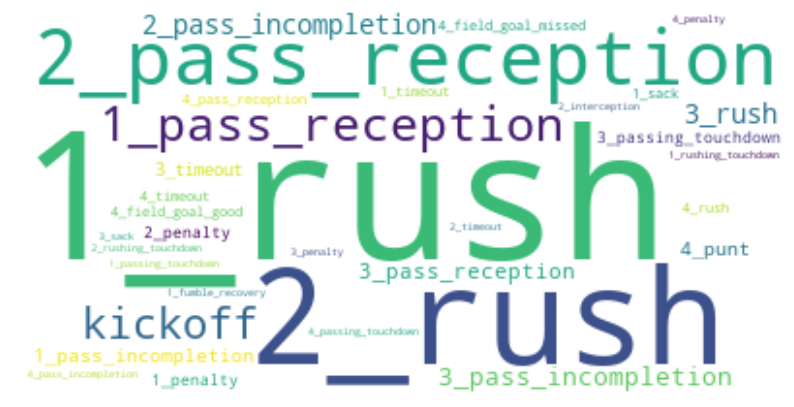

In [216]:
from wordcloud import WordCloud
word_cloud = WordCloud(collocations=False, background_color='white').generate(ex_cloud)
fig, ax=plt.subplots(figsize=(10,6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('C://Users/Blake/Downloads/Gzip_bow_cloud.png')
plt.show()



### text-only model vs baseline



In [217]:
bow_21 = bow_21.merge(train_df[['game_id','start_date']].copy(), how='left', on=['game_id'])
bow_22 = bow_22.merge(test_df[['game_id','start_date']].copy(), how='left', on=['game_id'])
bow_21 = bow_21.sort_values(by=['start_date']).drop_duplicates(subset=['game_id','team']).reset_index(drop=True)
bow_22 = bow_22.sort_values(by=['start_date']).drop_duplicates(subset=['game_id','team']).reset_index(drop=True)
bow_vec = [stat for stat in list(bow_21) if stat not in ['game_id','team','opp','team_points','start_date']]

In [222]:
bow_22

,start_date,game_id,team,opp,team_points,team_1_field_goal_good,opp_1_field_goal_good,team_1_fumble_recovery,opp_1_fumble_recovery,team_1_interception,...,exp_opp_4_pass_incompletion,exp_opp_4_pass_reception,exp_opp_4_passing_touchdown,exp_opp_4_penalty,exp_opp_4_punt,exp_opp_4_rush,exp_opp_4_rushing_touchdown,exp_opp_4_sack,exp_opp_4_timeout,exp_opp_kickoff
0,2022-08-27 16:00:00+00:00,401426532,Austin Peay,Western Kentucky,27,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-08-27 16:00:00+00:00,401426532,Western Kentucky,Austin Peay,38,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-08-27 16:30:00+00:00,401405059,Nebraska,Northwestern,28,0.0,0.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-08-27 16:30:00+00:00,401405059,Northwestern,Nebraska,31,0.0,0.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-08-27 19:30:00+00:00,401413213,Jacksonville State,Stephen F. Austin,42,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2837,2023-01-02 22:00:00+00:00,401442014,Penn State,Utah,35,0.0,0.0,0.0,0.0,0.0,...,0.461538,0.538462,0.076923,0.461538,2.538462,0.769231,0.076923,0.000000,0.384615,6.384615
2838,2023-01-08 19:00:00+00:00,401445817,South Dakota State,North Dakota State,45,0.0,0.0,0.0,1.0,0.0,...,0.153846,0.000000,0.000000,0.230769,3.230769,0.615385,0.076923,0.000000,0.538462,6.692308
2839,2023-01-08 19:00:00+00:00,401445817,North Dakota State,South Dakota State,21,0.0,0.0,1.0,0.0,0.0,...,0.083333,0.000000,0.000000,0.833333,3.750000,0.500000,0.083333,0.000000,0.333333,6.000000
2840,2023-01-10 00:30:00+00:00,401442010,Georgia,TCU,65,0.0,0.0,0.0,1.0,0.0,...,0.142857,0.571429,0.142857,0.571429,4.142857,0.642857,0.142857,0.142857,0.857143,7.428571


In [218]:

### add opponent vec
def prep_bow(df):
    
    df['team_no'] = df.groupby('game_id')['team'].transform(lambda x: x.rank(method='dense'))
    df = df.drop_duplicates(subset=['game_id','team_no']).reset_index(drop=True) # some duplicate rows
    df = df.pivot(index=['start_date','game_id'],columns=['team_no'], values=['team','team_points']+bow_vec).reset_index()
    bow_cols = ['start_date','game_id','team','opp','team_points','opp_points']
    for stat in bow_vec:
        bow_cols.append('team_'+stat)
        bow_cols.append('opp_'+stat)
    df.columns=bow_cols
    return df

bow_21 = prep_bow(bow_21.copy())
bow_22 = prep_bow(bow_22.copy())
## have to still create mirror df for teams that don't come first alphabetically
opp_bow_21 = bow_21.copy()
opp_bow_22 = bow_22.copy()

opp_cols = list(opp_bow_21)
opp_cols = [col.replace('team','placeholder') for col in opp_cols]
opp_cols = [col.replace('opp','team') for col in opp_cols]
opp_cols = [col.replace('placeholder','opp') for col in opp_cols]
opp_bow_21.columns=opp_cols
opp_bow_22.columns=opp_cols

bow_21 = pd.concat([bow_21, opp_bow_21], axis=0).sort_values(by='start_date').reset_index(drop=True)
bow_22 = pd.concat([bow_22, opp_bow_22], axis=0).sort_values(by='start_date').reset_index(drop=True)

bow_21 = bow_21.drop(columns=['opp_points']) # would be useful but not part of the experiment
bow_22 = bow_22.drop(columns=['opp_points']) # would be useful but not part of the experiment


In [219]:

team_bow_vec = ['team_'+stat for stat in bow_vec]
opp_bow_vec = ['opp_'+stat for stat in bow_vec]


In [223]:

train_df['exp_pass_avg'] = train_df.groupby(['team'])['team_passing_yards'].transform(lambda x: x.shift().expanding().mean())
train_df['exp_rush_avg'] = train_df.groupby(['team'])['team_rushing_yards'].transform(lambda x: x.shift().expanding().mean())
train_df['exp_opp_pass_avg'] = train_df.groupby(['opp'])['opp_passing_yards'].transform(lambda x: x.shift().expanding().mean())
train_df['exp_opp_rush_avg'] = train_df.groupby(['opp'])['opp_rushing_yards'].transform(lambda x: x.shift().expanding().mean())

bow_21[['exp_team_'+stat for stat in bow_vec]] = bow_21.groupby(['team'])[team_bow_vec].transform(lambda x: x.shift().expanding().mean())
bow_22[['exp_team_'+stat for stat in bow_vec]] = bow_22.groupby(['team'])[team_bow_vec].transform(lambda x: x.shift().expanding().mean())
bow_21[['exp_opp_'+stat for stat in bow_vec]] = bow_21.groupby(['opp'])[opp_bow_vec].transform(lambda x: x.shift().expanding().mean())
bow_22[['exp_opp_'+stat for stat in bow_vec]] = bow_22.groupby(['opp'])[opp_bow_vec].transform(lambda x: x.shift().expanding().mean())
test_df['exp_pass_avg'] = test_df.groupby(['team'])['team_passing_yards'].transform(lambda x: x.shift().expanding().mean())
test_df['exp_rush_avg'] = test_df.groupby(['team'])['team_rushing_yards'].transform(lambda x: x.shift().expanding().mean())
test_df['exp_opp_pass_avg'] = test_df.groupby(['opp'])['opp_passing_yards'].transform(lambda x: x.shift().expanding().mean())
test_df['exp_opp_rush_avg'] = test_df.groupby(['opp'])['opp_rushing_yards'].transform(lambda x: x.shift().expanding().mean())


train_df.head()


,game_id,team,opp,team_points,opp_points,team_passing_yards,opp_passing_yards,team_rushing_yards,opp_rushing_yards,start_date,exp_pass_avg,exp_rush_avg,exp_opp_pass_avg,exp_opp_rush_avg
0,401282714,Illinois,Nebraska,30,22,159,232,167,160,2021-08-28 17:20:00+00:00,NaN,NaN,NaN,NaN
1,401282714,Nebraska,Illinois,22,30,232,159,160,167,2021-08-28 17:20:00+00:00,NaN,NaN,NaN,NaN
2,401286187,Connecticut,Fresno State,0,45,72,382,35,156,2021-08-28 18:00:00+00:00,NaN,NaN,NaN,NaN
3,401286187,Fresno State,Connecticut,45,0,382,72,156,35,2021-08-28 18:00:00+00:00,NaN,NaN,NaN,NaN
4,401309833,UCLA,Hawai'i,44,10,148,243,244,26,2021-08-28 19:30:00+00:00,NaN,NaN,NaN,NaN


In [224]:
bow_22.isnull().sum(axis=0)

start_date                       0
game_id                          0
team                             0
opp                              0
team_points                      0
                              ... 
exp_opp_4_rush                 297
exp_opp_4_rushing_touchdown    297
exp_opp_4_sack                 297
exp_opp_4_timeout              297
exp_opp_kickoff                297
Length: 217, dtype: int64

In [226]:

## using 2H 2021 to train model
bow_21 = bow_21.dropna(subset=['exp_opp_4_pass_reception','exp_team_1_sack'])
bow_22 = bow_22.dropna(subset=['exp_opp_4_pass_reception','exp_team_1_sack'])
train_df = train_df.dropna(subset=['team_rushing_yards'])
test_df = test_df.dropna(subset=['team_rushing_yards'])

bow_21 = bow_21.loc[bow_21['game_id'].isin(train_df['game_id'].unique())].reset_index(drop=True)
bow_22 = bow_22.loc[bow_22['game_id'].isin(test_df['game_id'].unique())].reset_index(drop=True)

train_df = train_df.loc[train_df['game_id'].isin(bow_21['game_id'].unique())].reset_index(drop=True)
test_df = test_df.loc[test_df['game_id'].isin(bow_22['game_id'].unique())].reset_index(drop=True)


In [227]:
bow_22

,start_date,game_id,team,opp,team_points,team_1_field_goal_good,opp_1_field_goal_good,team_1_fumble_recovery,opp_1_fumble_recovery,team_1_interception,...,exp_opp_4_pass_incompletion,exp_opp_4_pass_reception,exp_opp_4_passing_touchdown,exp_opp_4_penalty,exp_opp_4_punt,exp_opp_4_rush,exp_opp_4_rushing_touchdown,exp_opp_4_sack,exp_opp_4_timeout,exp_opp_kickoff
0,2022-09-04 03:59:00+00:00,401426543,Hawai'i,Western Kentucky,17,0.0,0.0,0.0,0.0,0.0,...,0.000000,1.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,7.000000
1,2022-09-04 03:59:00+00:00,401426543,Western Kentucky,Hawai'i,49,0.0,0.0,0.0,0.0,1.0,...,2.000000,1.000000,0.000000,0.000000,6.000000,1.000000,0.000000,0.000000,1.000000,3.000000
2,2022-09-09 00:00:00+00:00,401420807,Missouri State,UT Martin,35,0.0,0.0,0.0,1.0,0.0,...,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000,6.000000
3,2022-09-09 00:00:00+00:00,401420807,UT Martin,Missouri State,30,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,6.000000
4,2022-09-10 01:00:00+00:00,401415214,Boise State,New Mexico,31,0.0,0.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2475,2023-01-02 22:00:00+00:00,401442014,Penn State,Utah,35,0.0,0.0,0.0,0.0,0.0,...,0.461538,0.538462,0.076923,0.461538,2.538462,0.769231,0.076923,0.000000,0.384615,6.384615
2476,2023-01-08 19:00:00+00:00,401445817,South Dakota State,North Dakota State,45,0.0,0.0,0.0,1.0,0.0,...,0.153846,0.000000,0.000000,0.230769,3.230769,0.615385,0.076923,0.000000,0.538462,6.692308
2477,2023-01-08 19:00:00+00:00,401445817,North Dakota State,South Dakota State,21,0.0,0.0,1.0,0.0,0.0,...,0.083333,0.000000,0.000000,0.833333,3.750000,0.500000,0.083333,0.000000,0.333333,6.000000
2478,2023-01-10 00:30:00+00:00,401442010,Georgia,TCU,65,0.0,0.0,0.0,1.0,0.0,...,0.142857,0.571429,0.142857,0.571429,4.142857,0.642857,0.142857,0.142857,0.857143,7.428571


In [228]:

from sklearn.linear_model import LinearRegression 


In [229]:

bow_train_subset = bow_21[len(bow_21)//2:].copy().reset_index(drop=True)
train_subset = train_df[len(train_df)//2:].copy().reset_index(drop=True)
print(len(bow_train_subset))

team_ss = StandardScaler()
team_pca = PCA(n_components=2)
opp_ss = StandardScaler()
opp_pca = PCA(n_components=2)
bow_lm = LinearRegression()
baseline_lm = LinearRegression()



700


In [230]:
bow_test_subset = bow_22[len(bow_22)//2:].copy().reset_index(drop=True)
bow_test_subset.head()

,start_date,game_id,team,opp,team_points,team_1_field_goal_good,opp_1_field_goal_good,team_1_fumble_recovery,opp_1_fumble_recovery,team_1_interception,...,exp_opp_4_pass_incompletion,exp_opp_4_pass_reception,exp_opp_4_passing_touchdown,exp_opp_4_penalty,exp_opp_4_punt,exp_opp_4_rush,exp_opp_4_rushing_touchdown,exp_opp_4_sack,exp_opp_4_timeout,exp_opp_kickoff
0,2022-10-22 19:00:00+00:00,401424956,Jackson State,Campbell,22,0.0,0.0,0.0,0.0,1.0,...,0.250000,1.5,0.000000,0.750000,4.750000,0.500000,0.25,0.500000,0.750000,6.250000
1,2022-10-22 19:00:00+00:00,401423921,Texas Southern,Alcorn State,34,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,10.500000,0.500000,0.00,0.000000,1.000000,4.500000
2,2022-10-22 19:00:00+00:00,401420830,Southern Illinois,South Dakota,24,0.0,0.0,0.0,0.0,0.0,...,0.500000,0.0,0.000000,0.666667,6.833333,1.000000,0.00,0.166667,0.833333,3.333333
3,2022-10-22 19:00:00+00:00,401420783,Morgan State,Delaware,7,0.0,0.0,0.0,0.0,1.0,...,0.666667,0.5,0.166667,0.666667,4.000000,0.833333,0.00,0.000000,0.666667,4.833333
4,2022-10-22 19:00:00+00:00,401418648,Tennessee Tech,Kennesaw State,30,1.0,1.0,0.0,1.0,0.0,...,0.333333,0.0,0.166667,0.500000,4.666667,1.333333,0.00,0.000000,1.833333,4.666667


In [231]:
team_bow_vec = ['exp_'+stat for stat in team_bow_vec]
opp_bow_vec = ['exp_'+stat for stat in opp_bow_vec]

In [232]:

bow_X1 = team_ss.fit_transform(bow_train_subset[team_bow_vec])
bow_X2 = opp_ss.fit_transform(bow_train_subset[opp_bow_vec])
bow_X1 = team_pca.fit_transform(bow_X1)
bow_X2 = opp_pca.fit_transform(bow_X2)
bow_X_train = np.concatenate([bow_X1, bow_X2], axis=1)
bow_target = bow_train_subset['team_points']
baseline_X_train = train_subset[['exp_pass_avg','exp_opp_pass_avg','exp_rush_avg','exp_opp_rush_avg']]
baseline_target = train_subset['team_points']
print(bow_X_train.shape, baseline_X_train.shape)
bow_lm.fit(bow_X_train, bow_target)
baseline_lm.fit(baseline_X_train, baseline_target)


(700, 4) (700, 4)


LinearRegression()

In [233]:

### going to test on 2H of 2022
bow_test_subset = bow_22[len(bow_22)//2:].copy().reset_index(drop=True)
test_subset = test_df[len(test_df)//2:].copy().reset_index(drop=True)

bow_test_X1 = team_ss.transform(bow_test_subset[team_bow_vec])
bow_test_X2 = opp_ss.transform(bow_test_subset[opp_bow_vec])
bow_test_X1 = team_pca.transform(bow_test_X1)
bow_test_X2 = opp_pca.transform(bow_test_X2)
bow_X_test = np.concatenate([bow_test_X1, bow_test_X2], axis=1)
baseline_X_test = test_subset[['exp_pass_avg','exp_opp_pass_avg','exp_rush_avg','exp_opp_rush_avg']]
bow_preds = bow_lm.predict(bow_X_test)
baseline_preds = baseline_lm.predict(baseline_X_test)


In [237]:
from sklearn.metrics import mean_squared_error

bow_test_y = bow_test_subset['team_points']
mean_squared_error(bow_test_y, bow_preds)

164.34376473592414

In [238]:

baseline_test_y = test_subset['team_points']
mean_squared_error(baseline_test_y, baseline_preds)


165.69502873742135

### gzip attempt

In [ ]:
test = dfPBP.copy().dropna(subset=['play_text']).reset_index(drop=True)
p5 = ['SEC','ACC','Big Ten','Pac-12','Big 12']
test = test.loc[test['offense_conference'].isin(p5)&(test['defense_conference'].isin(p5))].copy().reset_index(drop=True)
data = test.groupby(['game_id','offense','defense'])['play_text'].apply(lambda x: ' '.join(x))

In [148]:

def ncd(x1_blurb, x2_blurb):
    x1_comp = gzip.compress(x1_blurb.encode())
    x2_comp = gzip.compress(x2_blurb.encode())
    x1_comp_len = len(x1_comp)
    x2_comp_len = len(x2_comp)
    joined_len = len(gzip.compress(" ".join([x1_blurb, x2_blurb]).encode()))
    return (joined_len - min(x1_comp_len,x2_comp_len))/max(x1_comp_len,x2_comp_len)


In [149]:
data = data.reset_index()

In [150]:
data

,game_id,offense,defense,play_text
0,401403857,Florida,Utah,Nay'Quan Wright run for 9 yds to the Fla 17 An...
1,401403857,Utah,Florida,"Jordan Noyes kickoff for 61 yds , Ja'Markis We..."
2,401403858,Georgia,Oregon,"Jack Podlesny kickoff for 60 yds , Seven McGee..."
3,401403858,Oregon,Georgia,Mar'Keise Irving run for 7 yds to the Oregn 21...
4,401403867,Florida State,LSU,Ryan Fitzgerald kickoff for 55 yds Jordan Trav...
...,...,...,...,...
645,401442035,NC State,Maryland,Collin Smith kickoff for 65 yds for a touchbac...
646,401443542,Pittsburgh,UCLA,"PITTSBURGH Penalty, Delay of Game (-5 Yards) t..."
647,401443542,UCLA,Pittsburgh,RJ Lopez kickoff for 65 yds for a touchback Do...
648,401470891,North Carolina,Oregon,Drake Maye pass incomplete to Kamari Morales E...


In [151]:

## c
train_X = []
game_ids = []
i = 0
j = 0
for index, row in tqdm(data.iterrows(), total=len(data)):
    distances = []
    row_text = row['play_text']
    game_ids.append([row['game_id'],row['offense'],row['defense']])
    for j, jrow in data.copy().iterrows():
        jrow_text = jrow['play_text']
        dist = ncd(row_text, jrow_text)
        distances.append(dist)
    train_X.append(distances)



100%|████████████████████████████████████████████████████████████████████████████████| 650/650 [02:08<00:00,  5.07it/s]


In [153]:


pca = PCA(n_components=2)


In [154]:
pca.fit(np.array(train_X))
print(pca.explained_variance_ratio_)
print(pca.singular_values_)


PCA(n_components=2)

[0.14104848 0.07516588]


[9.71468521 7.09177426]


In [157]:
pca = PCA(n_components=2)
embeddings = pca.fit_transform(np.array(train_X))


In [158]:
scoring_data = dfPBP.groupby(['game_id','offense'])[['offense','defense','offense_score','defense_score']].last().copy().reset_index()

In [166]:
meta = pd.DataFrame(game_ids, columns=['game_id','offense','defense'])
meta.head()

,game_id,offense,defense
0,401403857,Florida,Utah
1,401403857,Utah,Florida
2,401403858,Georgia,Oregon
3,401403858,Oregon,Georgia
4,401403867,Florida State,LSU


In [167]:
meta = meta.rename(columns={'offense':'team','defense':'opp'})

In [163]:
scoring_data_rev = scoring_data.copy()
scoring_data = scoring_data.rename(columns={'offense':'team','defense':'opp','offense_score':'team_score','defense_score':'opp_score'})
scoring_data_rev = scoring_data_rev.rename(columns={'offense':'opp','defense':'team','offense_score':'opp_score','defense_score':'team_score'})
scoring_info = pd.concat([scoring_data, scoring_data_rev], axis=0).reset_index(drop=True)

In [168]:

meta = meta.merge(scoring_info.copy(), how='left', on=['game_id','team','opp'])



In [170]:
meta['score_diff'] = (meta['team_score'].copy()-meta['opp_score'].copy())
meta['score_total'] = meta['team_score'].copy()+meta['opp_score'].copy()

In [175]:
meta['score_total_norm'] = (meta['score_total'].copy())+30
# meta['score_diff_norm'] = meta_




In [174]:
meta['label'] = meta['team'].copy()+'_vs._'+meta['opp'].copy()

In [193]:

meta


,game_id,team,opp,team_score,opp_score,score_diff,score_total,score_total_norm,label
0,401403857,Florida,Utah,29,26,3,55,85,Florida_vs._Utah
1,401403857,Utah,Florida,26,29,-3,55,85,Utah_vs._Florida
2,401403858,Georgia,Oregon,49,3,46,52,82,Georgia_vs._Oregon
3,401403858,Oregon,Georgia,3,49,-46,52,82,Oregon_vs._Georgia
4,401403867,Florida State,LSU,23,24,-1,47,77,Florida State_vs._LSU
...,...,...,...,...,...,...,...,...,...
645,401442035,NC State,Maryland,12,16,-4,28,58,NC State_vs._Maryland
646,401443542,Pittsburgh,UCLA,37,35,2,72,102,Pittsburgh_vs._UCLA
647,401443542,UCLA,Pittsburgh,35,37,-2,72,102,UCLA_vs._Pittsburgh
648,401470891,North Carolina,Oregon,27,28,-1,55,85,North Carolina_vs._Oregon


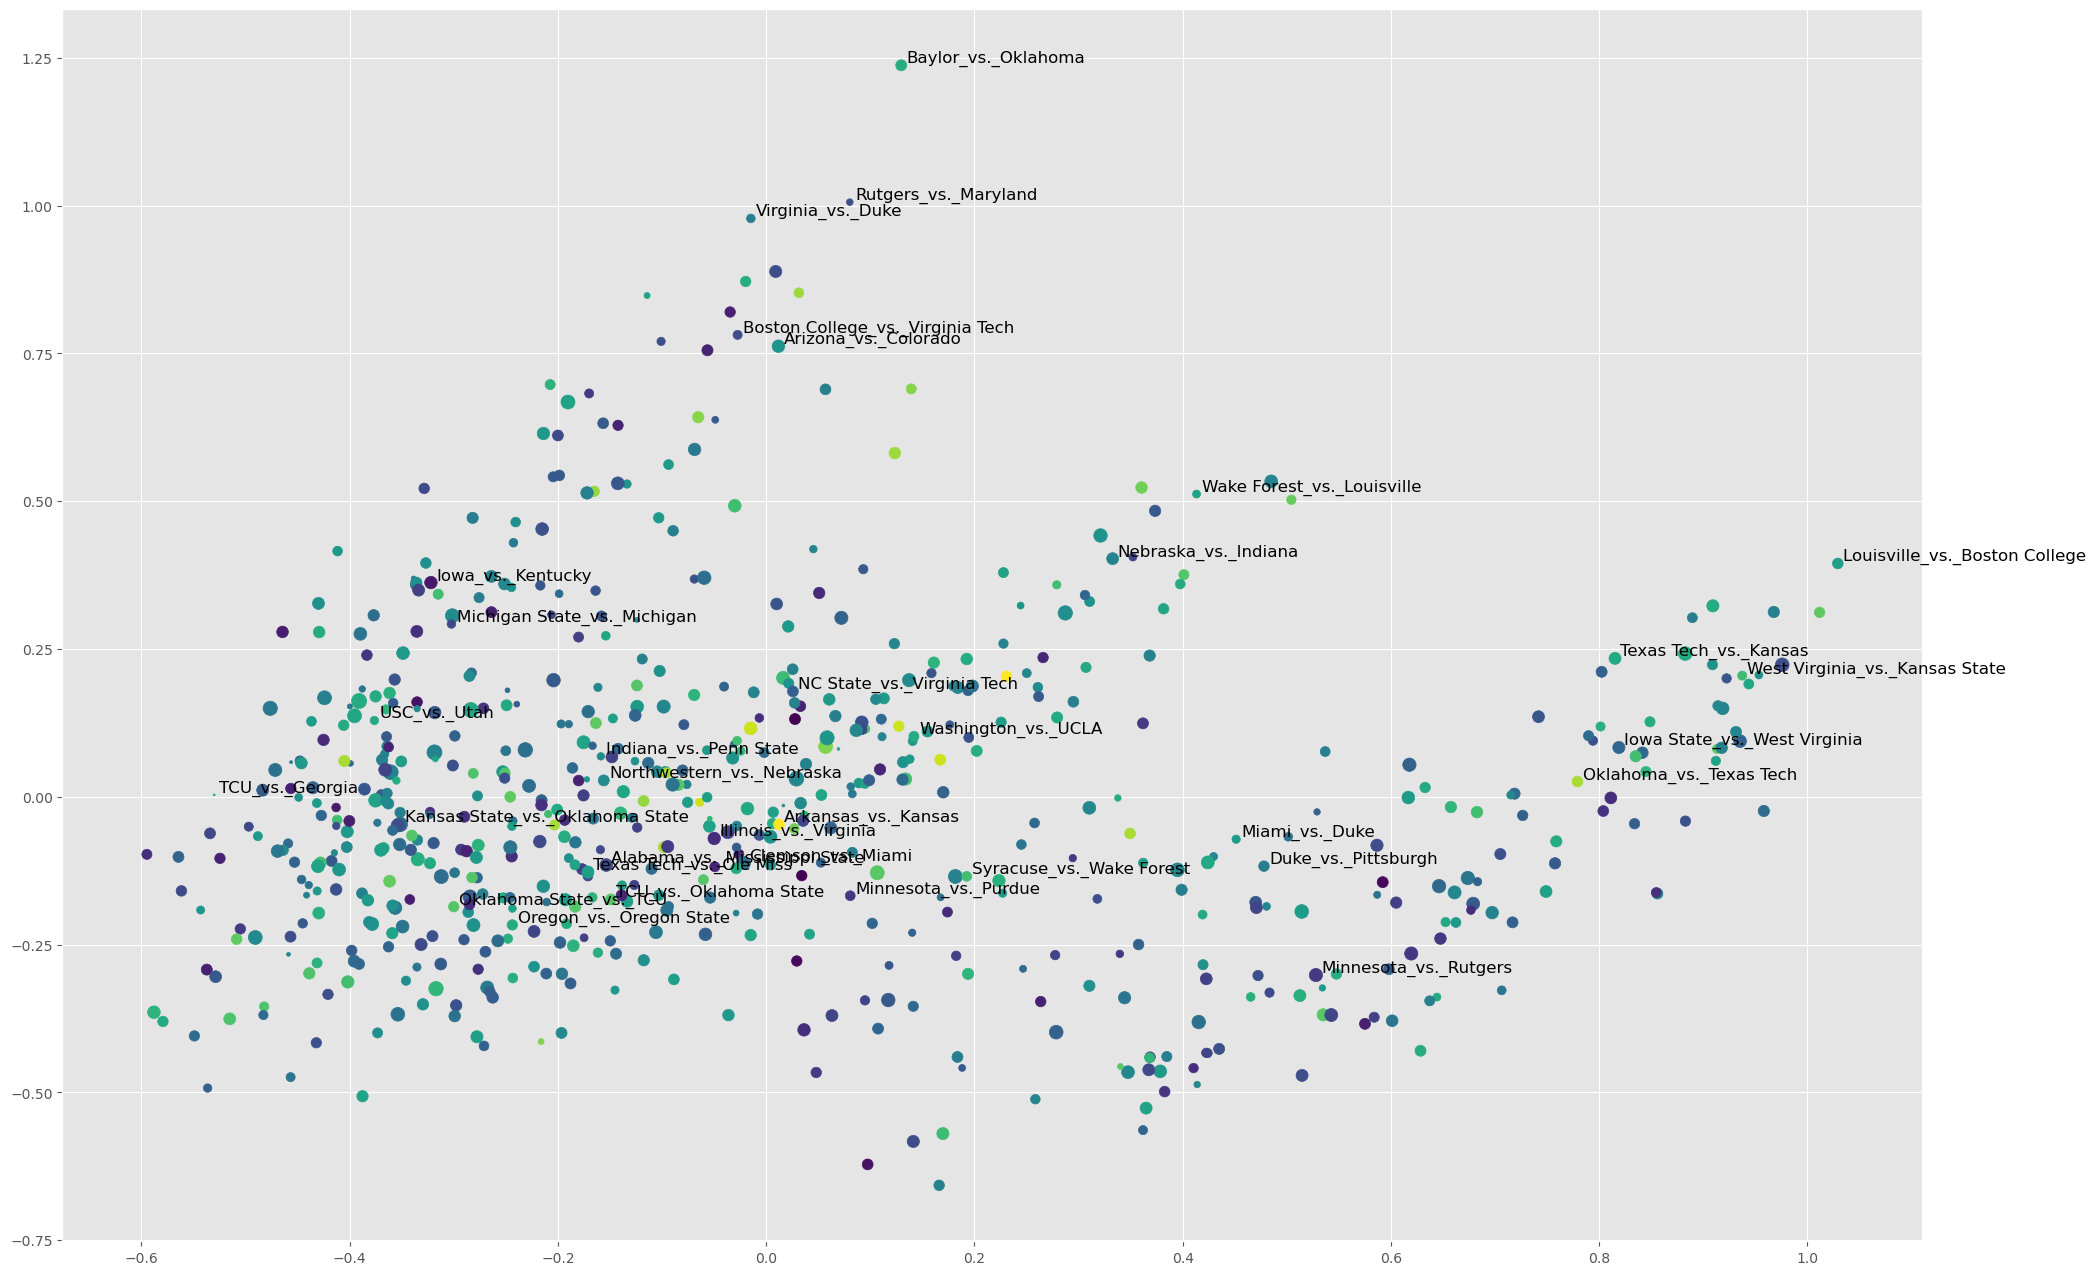

In [186]:


fig, ax=plt.subplots(figsize=(24,16))
ax.scatter(embeddings[:, 0], embeddings[:, 1], c=meta['score_total']+10, s=meta['score_diff']+60)
for i in range(embeddings.shape[0]):
    if embeddings[i, 1]>0.95:
        ax.text(x=embeddings[i,0]+0.005,y=embeddings[i,1]+0.005,s=meta.iloc[i]['label'],fontsize=12)
    if np.random.random()>0.95:
        ax.text(x=embeddings[i,0]+0.005,y=embeddings[i,1]+0.005,s=meta.iloc[i]['label'],fontsize=12)
#     if 'Georgia_' in meta.iloc[i]['label']:
#         ax.text(x=embeddings[i,0]+0.005,y=embeddings[i,1]+0.005,s=meta.iloc[i]['label'],fontsize=14)

